In [1]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 4671.5, 7007.5, -0.5)

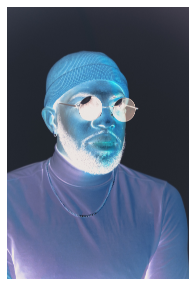

In [10]:
plt.rcParams['figure.figsize'] = [5,5]
plt.rcParams.update({'font.size' : 18})

A = imread(os.path.join('IMAGE.jpg'))
B = np.mean(A,-1); #Convert RGB to grayscale

plt.figure()
plt.imshow(256-A) # cmap='gray_r'
plt.axis('off')

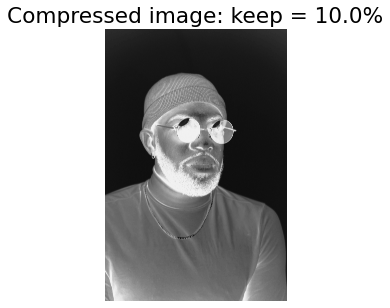

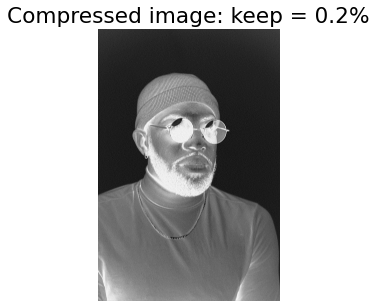

In [24]:
Bt = np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(-1))) #sort by magnitude

#Zero out all small coefficients and inverse transform
for keep in (0.1, 0.002):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt) > thresh # Find small indices
    Btlow = Bt * ind #Threshold small indices
    Alow = np.fft.ifft2(Btlow).real #Compressed image
    plt.figure()
    plt.imshow(256-Alow,cmap='gray')
    plt.axis('off')
    plt.title('Compressed image: keep = ' + str(keep*100) + '%')
    

5.0
